<a href="https://colab.research.google.com/github/vedanth-aggarwal/neural_network_exploration/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# Binary / Multiclass / Multilabel

from sklearn.datasets import make_circles

n_samples=1000
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

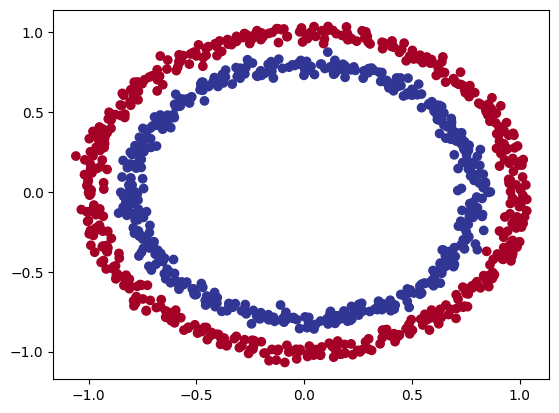

In [ ]:
import pandas as pd
circles = pd.DataFrame({'XO':X[:,0],'X1':X[:,1],'Label':y})

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [ ]:
# tensorflow playground

In [ ]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model1.fit(X,y,epochs=200,verbose=0)

# 50% percent accuracy means guessing

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model2.fit(X,y,epochs=100,verbose=1) # Still 50%

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.8122 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

* Create - more layer, neurons, activation
* Compile - optimizer
* Fitting - epochs

In [ ]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model3.fit(X,y,epochs=100,verbose=0) # Still 50%

In [ ]:
model3.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5017


[0.6931634545326233, 0.5017499923706055]

In [ ]:
import numpy as np

def plot_decision_boundary(model,X,y):
  # Axis boundaries and meshgrid
  x_min,x_max = X[:,0].min() - 0.1,X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1,X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2d arrays together
  y_pred = model.predict(x_in)
  # Multi class
  if len(y_pred[0]) > 1:
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 4ms/step


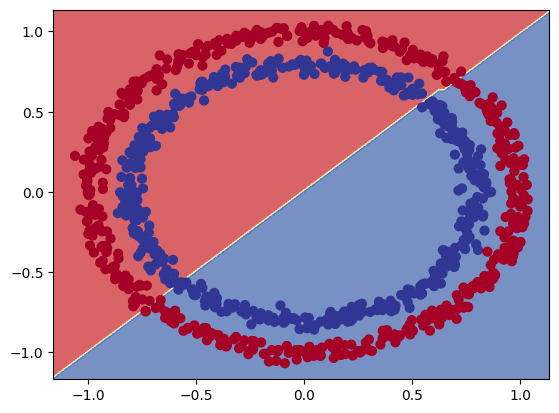

In [ ]:
plot_decision_boundary(model3,X,y)

In [ ]:
# Can't draw straight line through circular problem, not a regression problem
# cs231 convolutional neural netwoks

In [ ]:
tf.random.set_seed(42)
X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)
X_reg,y_reg

X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

X_reg_train.shape,y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

In [ ]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model4.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100,verbose=0)

2/2 [==============================] - 0s 11ms/step


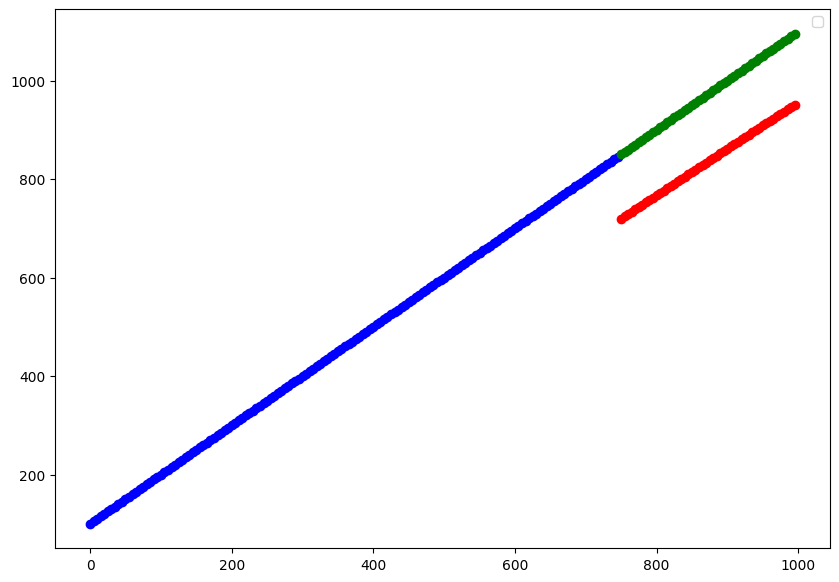

In [ ]:
y_reg_preds = model4.predict(tf.expand_dims(X_reg_test,axis=-1))
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b')
plt.scatter(X_reg_test,y_reg_test,c='g')
plt.scatter(X_reg_test,y_reg_preds,c='r')
plt.legend();

In [ ]:
model4.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 16ms/step - loss: 256.9201 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 254.4347 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 257.3442 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 250.5645 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 252.1459 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 254.3495 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 250.4719 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 248.9140 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 14ms/step - loss: 256.0494 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 16ms/step

In [ ]:
model4.evaluate(tf.expand_dims(X_reg_test,axis=-1),y_reg_test)

2/2 [==============================] - 1s 20ms/step - loss: 190.9311 - accuracy: 0.0000e+00


[190.93113708496094, 0.0]

In [ ]:
# Model needs non linearity
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu')
])

model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

history = model5.fit(X,y,epochs=100)
X.shape,y.shape

Epoch 1/100
32/32 [==============================] - 5s 4ms/step - loss: 2.4571 - accuracy: 0.2630
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2101 - accuracy: 0.2610
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.9793 - accuracy: 0.2590
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.7684 - accuracy: 0.2500
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.6633 - accuracy: 0.2490
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.6387 - accuracy: 0.2490
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.6161 - accuracy: 0.2470
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5925 - accuracy: 0.2420
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5564 - accuracy: 0.2390
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5258 - accuracy: 0.2350
Epoch 11/

((1000, 2), (1000,))

In [ ]:
# plot_decision_boundary
model5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7319 - accuracy: 0.3510


[0.7318663001060486, 0.35100001096725464]

In [ ]:
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

history = model6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5060
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5030
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5030
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5010
Epoch 11/

313/313 [==============================] - 1s 2ms/step


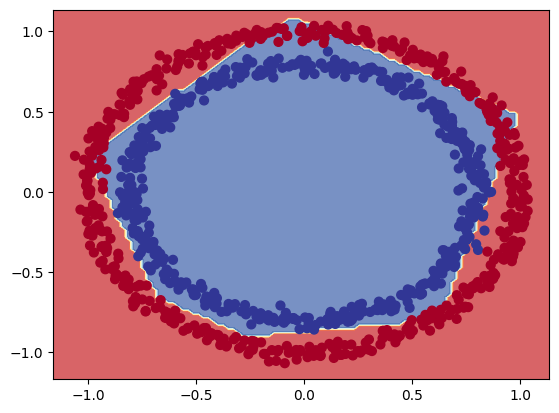

In [ ]:
import matplotlib.pyplot as plt
plot_decision_boundary(model6,X,y)

In [ ]:
model6.evaluate(X,y)
# THE COMBINATION OF LINEAR AND NON LINEAR IS FUNDAMENTAL OF NEURAL NETWORK

32/32 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.5000


[0.42700380086898804, 0.5]

In [ ]:
# We trained and tested on same data

In [ ]:
A = tf.cast(tf.range(-10,10),tf.float32)

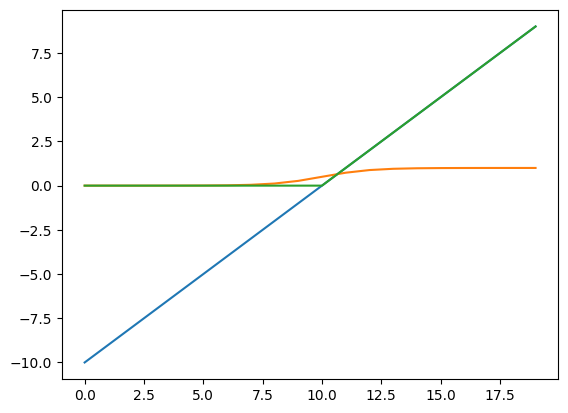

In [ ]:
# Build sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

def relu(x):
  return tf.maximum(x,0)

def linear(x):
  return x
# tf.keras.activations.linear(A)
# ml-cheatsheets activations
plt.plot(linear(A));
plt.plot(sigmoid(A));
plt.plot(relu(A));

In [ ]:
# Evaluating and improving classification
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

tf.random.set_seed(42)

model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])

history = model7.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6929 - accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.4988
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5013
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5038
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6892 - accuracy: 0.5063
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5113
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5100
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5138
Epoch 11/

In [ ]:
model7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.2870 - accuracy: 0.9900


[0.28703635931015015, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step


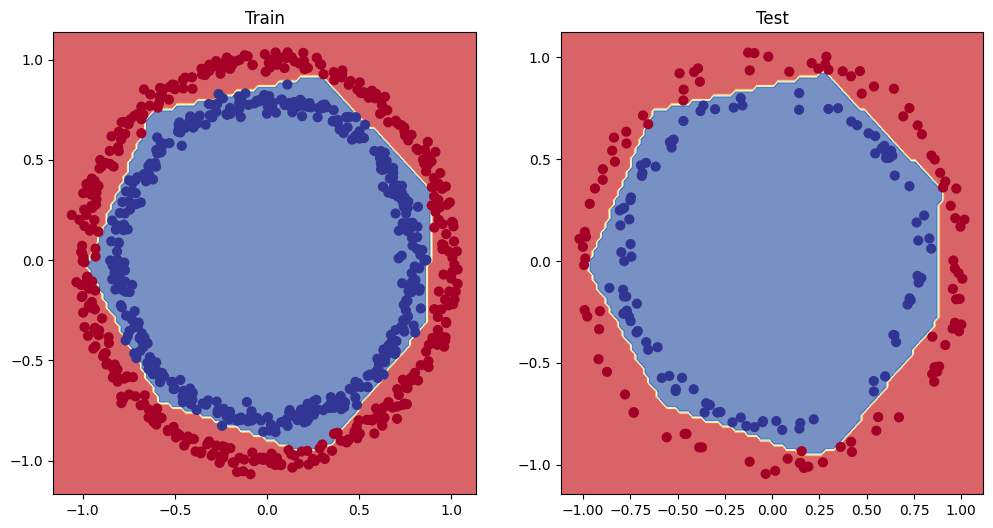

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model7,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model7,X_test,y_test)

<Axes: >

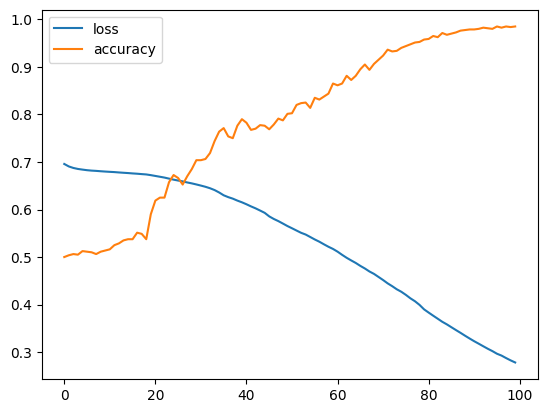

In [ ]:
# Plot the training or loss curves
import pandas as pd
pd.DataFrame(history.history).plot()


In [ ]:
# Find best learning rate ( loss dec most during training )
# - Callback
# - Another model and and modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer='Adam',
               metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model8.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7149 - accuracy: 0.4850 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.4762 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.4863 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.4825 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.4825 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.4775 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.4762 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.4812 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

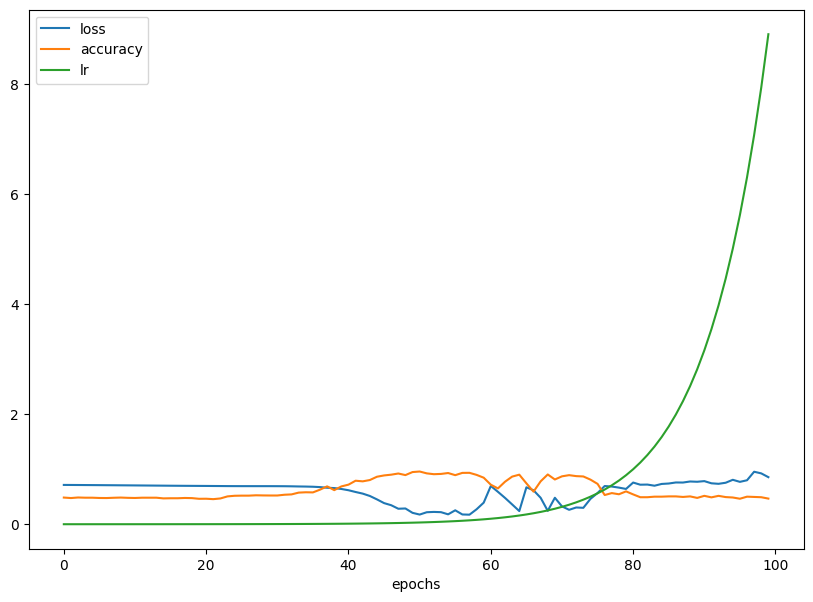

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

Text(0, 0.5, 'Loss')

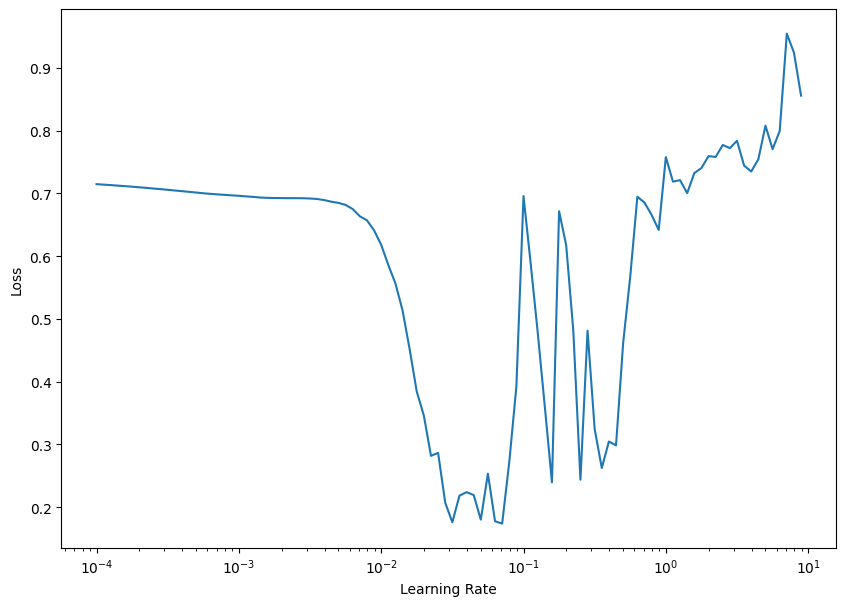

In [ ]:
#Learning rate vs loss
import matplotlib.pyplot as plt
lrs = 1e-4 * ( 10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

In [ ]:
# Typical LR - 10 to power 0,-1,-2,-3,1e-4

In [ ]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.02),
               metrics=['accuracy'])

history = model9.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6895 - accuracy: 0.5163
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5425
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5550
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5537
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5387
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5587
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5562
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5425
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5412
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5375
Epoch 11/

In [ ]:
# Accuracy - Bad for imbalance class
# Precision - False positive dec
# Recall - False negative dec ( PRECISION RECALL TRADEOFF )
# f1 - combination of Precision and recall
# Confusion matrix
# Classification report sklearn

In [ ]:
loss,accuracy = model9.evaluate(X_test,y_test)
print(loss,accuracy)

7/7 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.8550
0.4667728841304779 0.8550000190734863


7/7 [==============================] - 0s 3ms/step


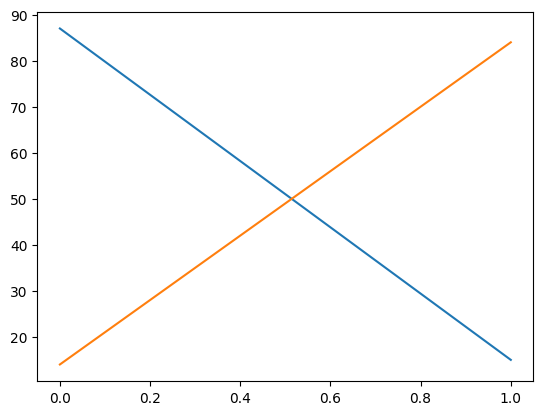

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = tf.round(model9.predict(X_test))

# Predictions array in prediction probability form
# Sigmoid standard output is this form


plt.plot(confusion_matrix(y_test,y_preds))

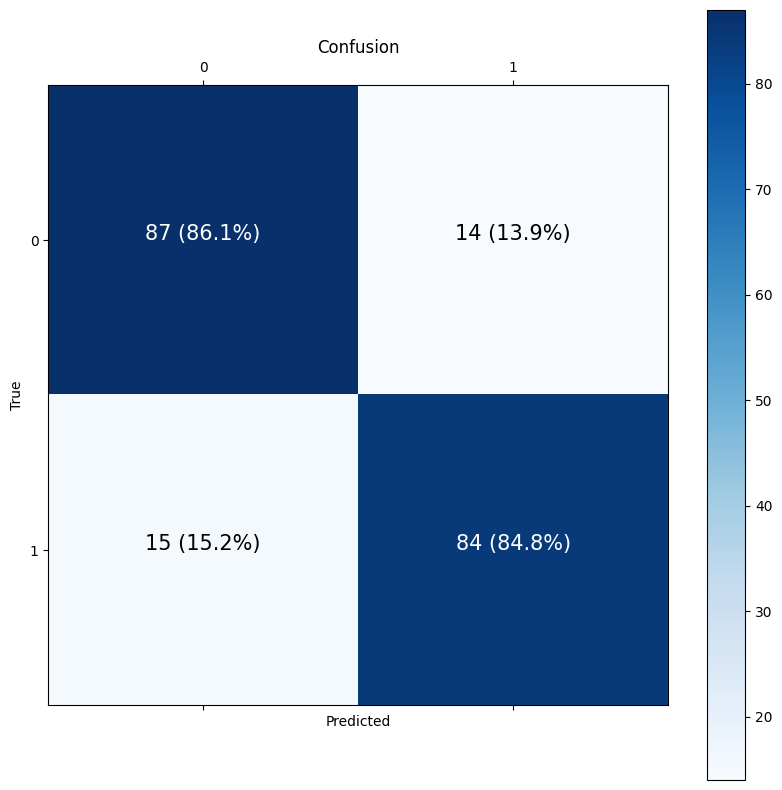

In [ ]:
import itertools

figsize=(10,10)

cm = confusion_matrix(y_test,y_preds)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

fig,ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm,cmap=plt.cm.Blues)

fig.colorbar(cax)

classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title='Confusion',xlabel='Predicted',
       ylabel='True',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label.position('bottom')
ax.xaxis.tick_bottom()

threshold = (cm.max() + cm.min()) / 2.

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j] > threshold else 'black',
           size=15)

In [ ]:
# Multi class classification
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Already split into training test
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


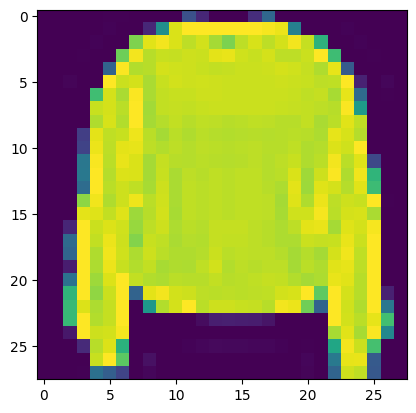

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
class_names=['T-shirt/top,Trouser','Pullover','Dress','Coat',
             'Sandel','Shirt','Sneaker','Bag','Aknle boot']

Text(0.5, 1.0, 'T-shirt/top,Trouser')

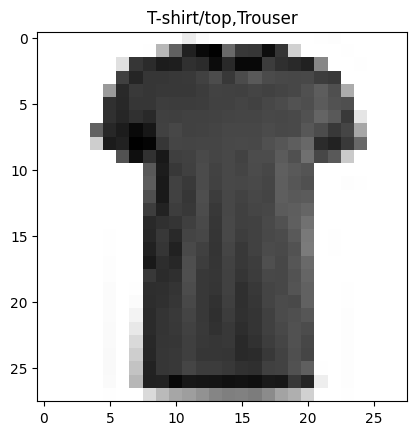

In [ ]:
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

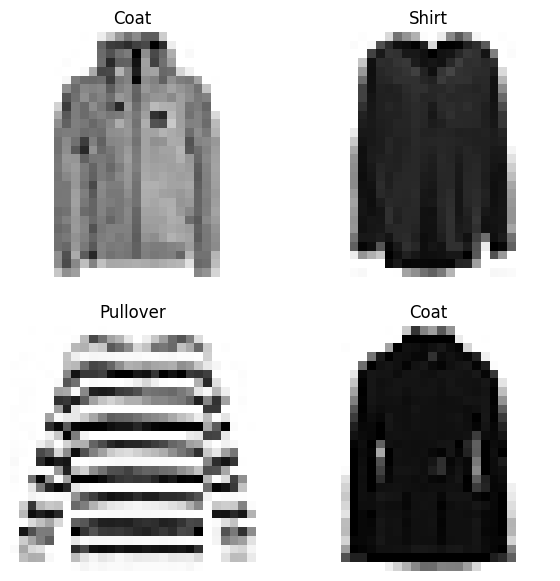

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand]-1])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)
# Input shape = 28,28
# Output is 10 shape

# error because categorical cross entrophy needs one hot so sparse is used for integers
model10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #.output_shape
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


# tf.one_hot(value,depth=10)
model10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'],
                optimizer=tf.keras.optimizers.Adam())

non_norm_history = model10.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,
                               validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 2.3478 - accuracy: 0.1762 - val_loss: 1.9999 - val_accuracy: 0.2088
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9807 - accuracy: 0.2113 - val_loss: 1.9423 - val_accuracy: 0.2247
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8922 - accuracy: 0.2388 - val_loss: 1.7793 - val_accuracy: 0.2681
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6710 - accuracy: 0.2803 - val_loss: 1.6322 - val_accuracy: 0.2850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6068 - accuracy: 0.2898 - val_loss: 1.5898 - val_accuracy: 0.2937
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5714 - accuracy: 0.3104 - val_loss: 1.5507 - val_accuracy: 0.3392
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5470 - accuracy: 0.3271 - val_loss: 1.5379 - val_accurac

In [ ]:
model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data_norm = train_data/255.0 # normalize betwee 0 and 1
test_data_norm = test_data/255.0

In [ ]:
tf.random.set_seed(42)
# Output is 10 shape

# error because categorical cross entrophy needs one hot so sparse is used for integers
model11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #.output_shape
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


# tf.one_hot(value,depth=10)
model11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'],
                optimizer=tf.keras.optimizers.Adam())

norm_history = model11.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1412 - accuracy: 0.5921 - val_loss: 0.8623 - val_accuracy: 0.6963
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7661 - accuracy: 0.7274 - val_loss: 0.7809 - val_accuracy: 0.7333
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6549 - accuracy: 0.7808 - val_loss: 0.6563 - val_accuracy: 0.7835
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5895 - accuracy: 0.8072 - val_loss: 0.6251 - val_accuracy: 0.7955
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5671 - accuracy: 0.8117 - val_loss: 0.6176 - val_accuracy: 0.8020
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5508 - accuracy: 0.8155 - val_loss: 0.6073 - val_accuracy: 0.8030
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5404 - accuracy: 0.8200 - val_loss: 0.6024 - val_accuracy:

<Axes: title={'center': 'Normalized'}>

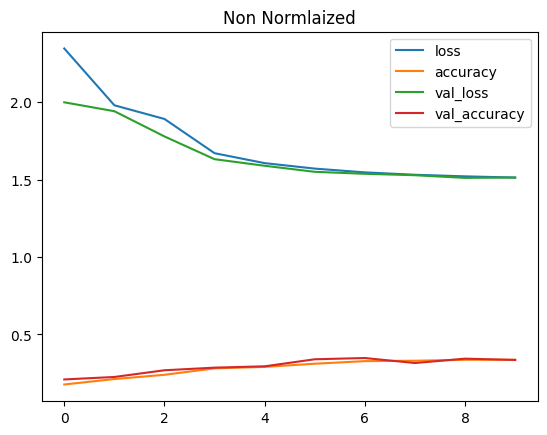

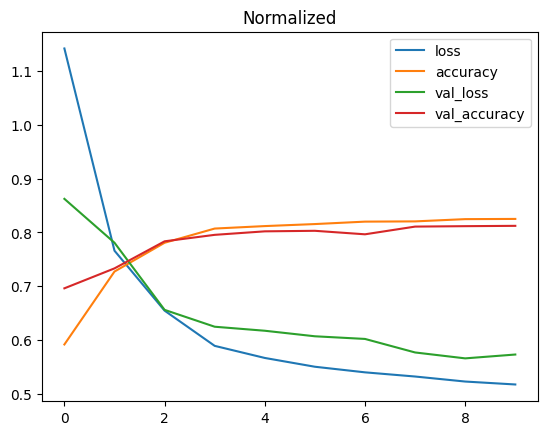

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title='Non Normlaized')
pd.DataFrame(norm_history.history).plot(title='Normalized')

In [ ]:
# Find ideal learning rate
tf.random.set_seed(42)
# Output is 10 shape

# error because categorical cross entrophy needs one hot so sparse is used for integers
model11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #.output_shape
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


# tf.one_hot(value,depth=10)
model11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'],
                optimizer=tf.keras.optimizers.Adam()) # 0.001 is ideal learning rate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

lr_history = model11.fit(train_data_norm,
                           train_labels,
                           epochs=40,
                           validation_data=(test_data_norm,test_labels),
                           callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 14s 6ms/step - loss: 1.1063 - accuracy: 0.5797 - val_loss: 0.7649 - val_accuracy: 0.7009 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6635 - accuracy: 0.7465 - val_loss: 0.6372 - val_accuracy: 0.7730 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5898 - accuracy: 0.7821 - val_loss: 0.6122 - val_accuracy: 0.7743 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5585 - accuracy: 0.8024 - val_loss: 0.5734 - val_accuracy: 0.8038 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5375 - accuracy: 0.8145 - val_loss: 0.5578 - val_accuracy: 0.8065 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5246 - accuracy: 0.8198 - val_loss: 0.5754 - val_accuracy: 0.7999 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] -

Text(0.5, 1.0, 'Ideal Learning Rate')

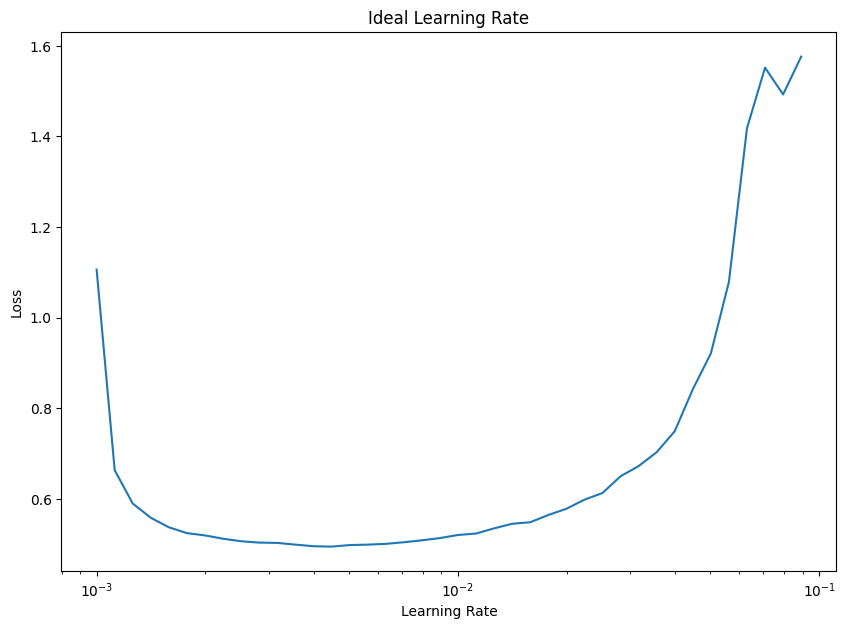

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * ( 10 ** (tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Ideal Learning Rate')

In [ ]:
# Find ideal learning rate
tf.random.set_seed(42)
# Output is 10 shape

# error because categorical cross entrophy needs one hot so sparse is used for integers
model12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #.output_shape
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


# tf.one_hot(value,depth=10)
model12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'],
                optimizer=tf.keras.optimizers.Adam()) # 0.001 is ideal learning rate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

lr_history = model12.fit(train_data_norm,
                           train_labels,
                           epochs=20,
                           validation_data=(test_data_norm,test_labels),
                           callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.2843 - accuracy: 0.5413 - val_loss: 0.9458 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8556 - accuracy: 0.7167 - val_loss: 0.8335 - val_accuracy: 0.7043 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7653 - accuracy: 0.7316 - val_loss: 0.7646 - val_accuracy: 0.7278 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7083 - accuracy: 0.7484 - val_loss: 0.6923 - val_accuracy: 0.7572 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6468 - accuracy: 0.7713 - val_loss: 0.6518 - val_accuracy: 0.7725 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6099 - accuracy: 0.7854 - val_loss: 0.6220 - val_accuracy: 0.7862 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 6s

In [ ]:
# Evaluate - confusion matrix, visualize, train longer, save model

In [ ]:
# Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]-1

  fig,ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm,cmap=plt.cm.Blues)

  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title='Confusion',xlabel='Predicted',
        ylabel='True',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j] > threshold else 'black',
            size=text_size)

In [ ]:
# Make predictions on same data it was trained on

y_probs = model12.predict(test_data_norm)
y_probs

313/313 [==============================] - 0s 2ms/step


array([[1.7305053e-11, 3.4687901e-15, 1.4036898e-12, ..., 7.5423263e-02,
        1.5305683e-04, 8.3826488e-01],
       [4.2015690e-05, 8.3089403e-11, 7.6409984e-01, ..., 2.8399240e-18,
        2.1191975e-03, 9.6942340e-23],
       [2.9364864e-03, 9.6574700e-01, 2.1714806e-04, ..., 1.0258468e-02,
        1.3793591e-05, 8.6312903e-06],
       ...,
       [1.7450058e-01, 1.4766179e-10, 2.4804696e-03, ..., 6.7005589e-16,
        7.3533994e-01, 2.7100588e-17],
       [3.0806942e-03, 9.6317023e-01, 2.2436831e-04, ..., 1.1412122e-02,
        1.5493792e-05, 9.6452177e-06],
       [1.7449611e-05, 6.3264844e-07, 9.6013282e-06, ..., 4.6276417e-02,
        8.2733817e-03, 5.7926727e-03]], dtype=float32)

In [ ]:
y_preds = tf.argmax(y_probs,axis=1)
y_preds

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[820,   1,  31,  47,   7,   1,  89,   0,   4,   0],
       [ 10, 913,  10,  63,   2,   0,   2,   0,   0,   0],
       [ 32,   1, 717,  14, 149,   0,  86,   0,   1,   0],
       [ 49,   7,  18, 801,  59,   0,  58,   0,   8,   0],
       [  3,   0, 107,  46, 749,   0,  93,   0,   2,   0],
       [  0,   0,   1,   1,   0, 900,   0,  45,  12,  41],
       [175,   1, 167,  41, 122,   1, 487,   0,   6,   0],
       [  0,   0,   0,   0,   0,  30,   0, 879,   2,  89],
       [  7,   1,  55,   4,  10,   7,  10,   5, 901,   0],
       [  0,   0,   0,   0,   0,  35,   1,  30,   1, 933]])

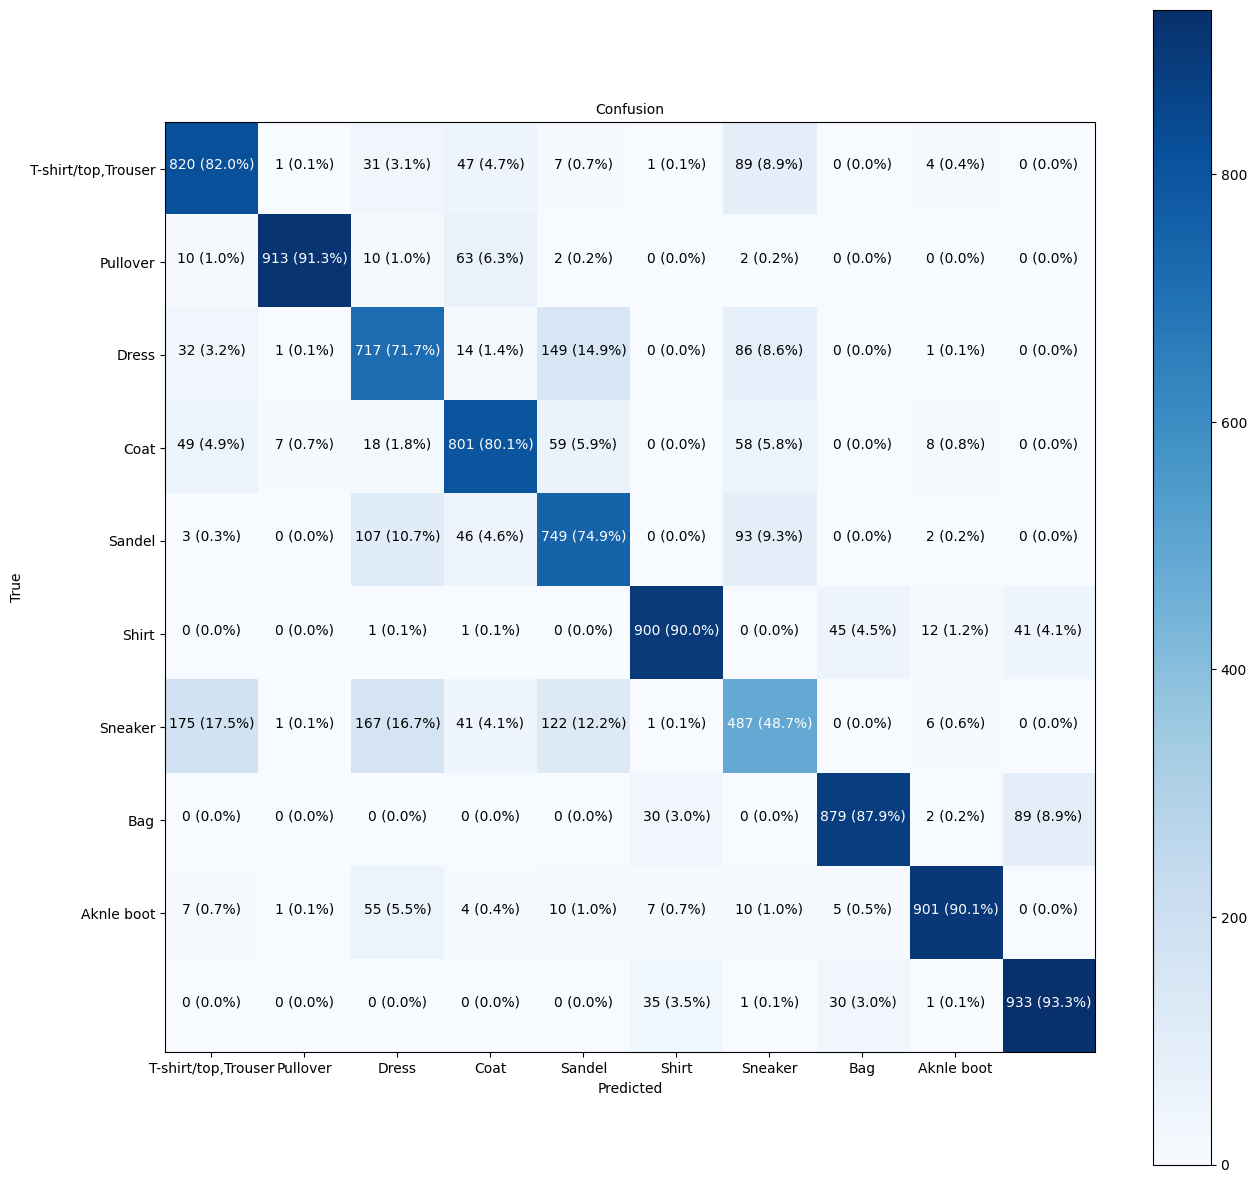

In [ ]:
make_confusion_matrix(test_labels,y_preds,classes=class_names,figsize=(15,15),text_size=10)

In [ ]:
import random

def plot_random(model,images,true_labels,classes):
  i = random.randint(0,len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label==true_label:
    color = 'green'
  else:
    color='red'

  plt.xlabel('Pred: {} {:2.0f}% (True:{})'.format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color)

1/1 [==============================] - 0s 95ms/step


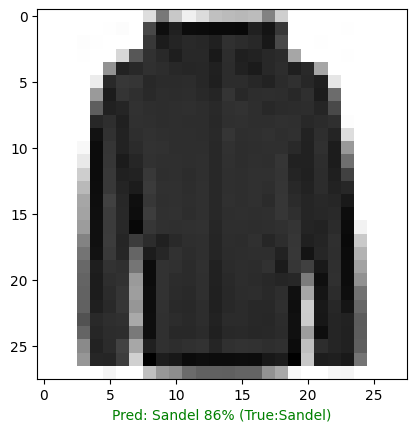

In [ ]:
plot_random(model12,test_data_norm,test_labels,class_names)

In [ ]:
# What patterns is our model learning

model12.layers

In [ ]:
weights,biases = model12.layers[1].get_weights() # get patterns of a layer

In [ ]:
# for each layer ( 784 ) it has 4 paramaters it adjusts ( 4 neurons )
weights.shape

(784, 4)

In [ ]:
biases.shape # every hidden unit has 1 bias metric
# Every neuron has a bias vector paired with a weights vector but bias is 0 and weight is random initialize
3# bias dictates how much patterns within corrsponding weights matrix should influence next layer

(4,)

In [ ]:
model12.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


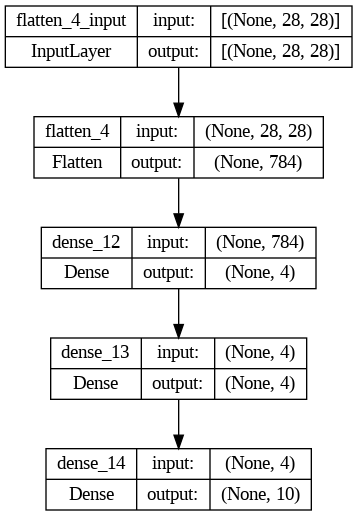

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model12,show_shapes=True)